In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Resources/m160-hw-dataset.csv',encoding = 'utf-8')
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [3]:
#Checking the null values
null_value_rows = df[df.isnull().any(axis = 1)]
print(f'There are total of {len(null_value_rows)} rows with a null value in the dataset')
df.isnull().sum()

There are total of 64091 rows with a null value in the dataset


Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [4]:
#Dropping the null values
clean_df = df.dropna()

#Checking the remaining null values
print(clean_df.isnull().sum())
print('\n')

#Checking the size of the data
print(f'This data now contains {clean_df.shape[0]} rows and {clean_df.shape[1]} columns')

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64


This data now contains 36423 rows and 19 columns


In [5]:
print('Finding unique values in each column')
for i in clean_df.columns[:]:
  print("-"*75)
  print("# of unique values of ",i," column :", clean_df[i].nunique())
  print("unique values:")
  print(clean_df[i].unique())

Finding unique values in each column
---------------------------------------------------------------------------
# of unique values of  Loan ID  column : 29490
unique values:
['4eed4e6a-aa2f-4c91-8651-ce984ee8fb26'
 '273581de-85d8-4332-81a5-19b04ce68666'
 '8af915d9-9e91-44a0-b5a2-564a45c12089' ...
 '8506a4e9-af7d-47d2-a1bf-7ea2c41858f0'
 '06eba04f-58fc-424a-b666-ed72aa008900'
 'e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7']
---------------------------------------------------------------------------
# of unique values of  Customer ID  column : 29490
unique values:
['5efb2b2b-bf11-4dfd-a572-3761a2694725'
 '90a75dde-34d5-419c-90dc-1e58b04b3e35'
 'af534dea-d27e-4fd6-9de8-efaa52a78ec0' ...
 'be67200e-1ef1-4b63-86a6-2bf27d3c704d'
 '77f2252a-b7d1-4b07-a746-1202a8304290'
 '2ced5f10-bd60-4a11-9134-cadce4e7b0a3']
---------------------------------------------------------------------------
# of unique values of  Loan Status  column : 2
unique values:
['Fully Paid' 'Charged Off']
--------------------------

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [7]:
# Using .loc to ensure we are modifying the DataFrame correctly
clean_df.loc[:, 'Loan Status'] = clean_df['Loan Status'].str.lower().str.strip().replace({
    'fully paid': 'Fully Paid', 
    'charged off': 'Charged Off'
})


In [8]:
clean_df.loc[:, 'Term'] = clean_df['Term'].str.lower().str.strip().replace({
    'short term': 'Short Term', 
    'long term': 'Long Term'
})

In [9]:
# Check the distribution of 'Loan Status'
loan_status_distribution = clean_df['Loan Status'].value_counts()
print("Loan Status Distribution:\n", loan_status_distribution)

Loan Status Distribution:
 Loan Status
Fully Paid     28972
Charged Off     7451
Name: count, dtype: int64


In [10]:
# Check the distribution of 'Term'
term_distribution = clean_df['Term'].value_counts()
print("Term Distribution:\n", term_distribution)

Term Distribution:
 Term
Short Term    25855
Long Term     10568
Name: count, dtype: int64


In [11]:
# Define mapping for Loan Status
loan_status_map = {'Fully Paid': 1, 'Charged Off': 0}

In [12]:
# Define mapping for Term
term_map = {'Short Term': 1, 'Long Term': 0}

In [13]:
# Apply mapping to create new numerical columns using .loc
clean_df.loc[:, 'Loan Status Numerical'] = clean_df['Loan Status'].map(loan_status_map)
clean_df.loc[:, 'Term Numerical'] = clean_df['Term'].map(term_map)


C:\Users\sunny\AppData\Local\Temp\ipykernel_5944\3077055371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.loc[:, 'Loan Status Numerical'] = clean_df['Loan Status'].map(loan_status_map)
C:\Users\sunny\AppData\Local\Temp\ipykernel_5944\3077055371.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.loc[:, 'Term Numerical'] = clean_df['Term'].map(term_map)


In [14]:
clean_df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,...,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status Numerical,Term Numerical
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,...,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,1,1
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,...,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0,1,1
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,...,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0,1,1
10,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,Fully Paid,99999999.0,Short Term,728.0,714628.0,3 years,Rent,Debt Consolidation,...,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0,1,1
12,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,Fully Paid,99999999.0,Short Term,740.0,776188.0,< 1 year,Own Home,Debt Consolidation,...,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0,1,1


In [15]:
cleaned_data = clean_df[(clean_df['Current Loan Amount'] <= 1000000) & (clean_df['Credit Score'] <= 1000)]

In [16]:
cleaned_data.to_csv("Resources/cleaned_m160.csv", encoding='utf-8')
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29550 entries, 6 to 99997
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       29550 non-null  object 
 1   Customer ID                   29550 non-null  object 
 2   Loan Status                   29550 non-null  object 
 3   Current Loan Amount           29550 non-null  float64
 4   Term                          29550 non-null  object 
 5   Credit Score                  29550 non-null  float64
 6   Annual Income                 29550 non-null  float64
 7   Years in current job          29550 non-null  object 
 8   Home Ownership                29550 non-null  object 
 9   Purpose                       29550 non-null  object 
 10  Monthly Debt                  29550 non-null  float64
 11  Years of Credit History       29550 non-null  float64
 12  Months since last delinquent  29550 non-null  float64
 13  Number

C:\Users\sunny\AppData\Local\Temp\ipykernel_5944\844340591.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Credit Score Range'] = pd.cut(cleaned_data['Credit Score'], bins=bins, labels=labels, right=False)
C:\Users\sunny\AppData\Local\Temp\ipykernel_5944\844340591.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_income = cleaned_data.groupby('Credit Score Range')['Annual Income'].mean().reset_index()


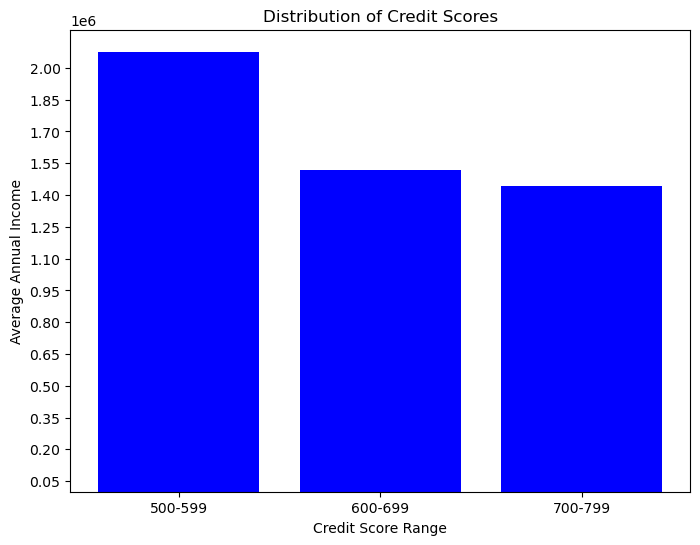

In [20]:


bins = [300, 400, 500, 600, 700, 800, 900, 1000]
labels = ['300-399', '400-499', '500-599', '600-699', '700-799', '800-899', '900-1000']
# Group the data by credit score ranges
cleaned_data['Credit Score Range'] = pd.cut(cleaned_data['Credit Score'], bins=bins, labels=labels, right=False)

avg_income = cleaned_data.groupby('Credit Score Range')['Annual Income'].mean().reset_index()
#avg_income = cleaned_data.groupby(pd.cut(cleaned_data['Credit Score'], bins=bins, labels=labels)).size()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(avg_income['Credit Score Range'], avg_income['Annual Income'], color='blue')

# Set the labels and title
plt.xlabel('Credit Score Range')
plt.ylabel('Average Annual Income')
plt.title('Distribution of Credit Scores')
plt.yticks(np.arange(50000, 2000001, 150000))
plt.show()


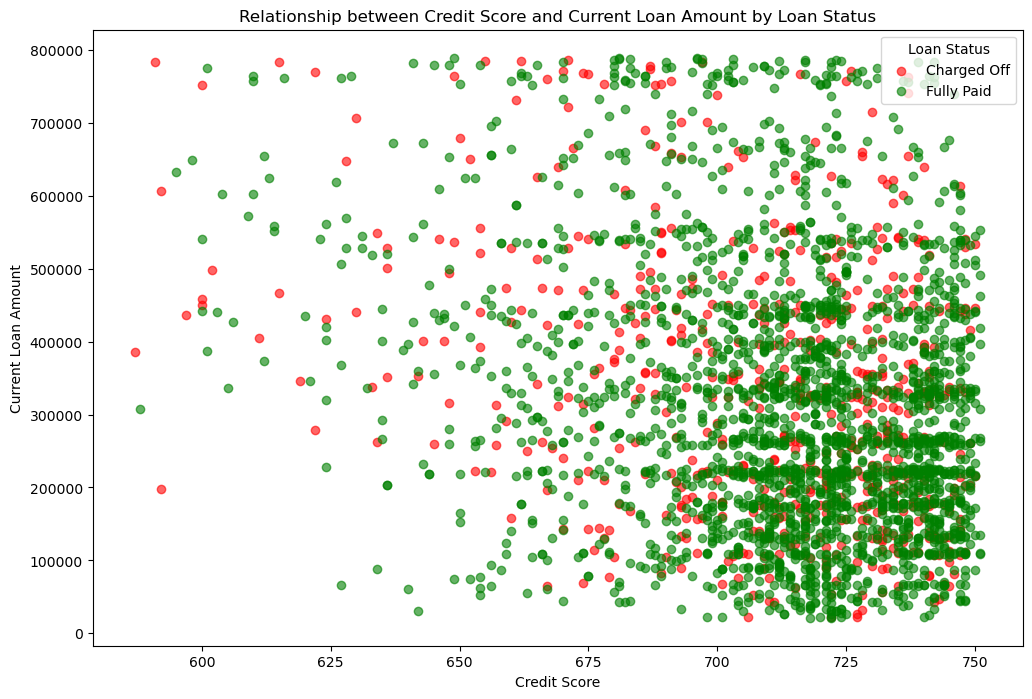

In [18]:
sampled_df = cleaned_data.sample(frac=0.1, random_state=42)

plt.figure(figsize=(12, 8))
colors = {0: 'red', 1: 'green'}
loan_status_labels = {0: "Charged Off", 1: "Fully Paid"}
for status, color in colors.items():
    subset = sampled_df[sampled_df['Loan Status Numerical'] == status]
    plt.scatter(subset['Credit Score'], subset['Current Loan Amount'], 
                c=color, label=loan_status_labels[status], alpha=0.6)
#plt.scatter(sampled_df['Credit Score'], sampled_df['Current Loan Amount'], c=sampled_df['Loan Status Numerical'].map(colors), alpha=0.6)
plt.title('Relationship between Credit Score and Current Loan Amount by Loan Status')
plt.xlabel('Credit Score')
plt.ylabel('Current Loan Amount')
plt.legend(title='Loan Status', loc ="upper right")
plt.show()

In [22]:
cleaned_data.head(25)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,...,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status Numerical,Term Numerical,Credit Score Range
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,...,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0,1,1,700-799
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,...,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0,1,1,600-699
14,2e841c8f-3dc1-464d-91c1-3d3d51e64c38,2ac05980-7848-4692-89ae-9321afe650f8,Fully Paid,234124.0,Short Term,727.0,693234.0,10+ years,Rent,Debt Consolidation,...,46.0,10.0,1.0,28291.0,107052.0,1.0,0.0,1,1,700-799
17,24e8c8bd-d10b-4dac-8b81-1da470ff5ecb,967e8733-7189-49b7-a3ab-6a1d0e1abdac,Fully Paid,666204.0,Long Term,723.0,1821967.0,10+ years,Home Mortgage,Debt Consolidation,...,34.0,15.0,0.0,813694.0,2004618.0,0.0,0.0,1,0,700-799
20,150ebbad-ebed-441e-b70d-2f350ad7dca6,40f729c9-54c7-4768-9fb5-2fa41d074c48,Charged Off,317108.0,Long Term,687.0,1133274.0,8 years,Rent,Debt Consolidation,...,53.0,4.0,0.0,60287.0,126940.0,0.0,0.0,0,0,600-699
25,578c8e10-3214-4491-bdbc-b1695ef8ff87,cbe53e22-ba67-4eaf-a4fb-c5acdd12ec66,Fully Paid,465410.0,Long Term,688.0,1722654.0,3 years,Rent,Buy House,...,30.0,7.0,0.0,107559.0,488356.0,0.0,0.0,1,0,600-699
39,f7db4043-3607-46fe-a421-edf3281eed7c,f7581a72-d073-48a3-934f-14bdfae93691,Fully Paid,449108.0,Short Term,718.0,1454507.0,8 years,Home Mortgage,Debt Consolidation,...,21.0,14.0,0.0,193990.0,458414.0,0.0,0.0,1,1,700-799
40,21d019a9-dc53-40e9-9c88-1ec3378283fe,64560eb4-f50d-4f14-8a86-b46c0381bef2,Charged Off,688468.0,Long Term,682.0,1494616.0,< 1 year,Rent,Debt Consolidation,...,50.0,8.0,0.0,343995.0,843854.0,0.0,0.0,0,0,600-699
44,93d2f093-833c-42a3-8879-05ab3bd73951,c5a714bb-75c6-4264-a807-8a35bb12ce7d,Fully Paid,311762.0,Long Term,680.0,2211657.0,4 years,Home Mortgage,Debt Consolidation,...,15.0,11.0,0.0,213921.0,509652.0,0.0,0.0,1,0,600-699
46,2e30d6ea-3157-4537-99d9-f580eeaae1d5,5d71bb9d-ce8b-499d-91bf-3df92426430d,Fully Paid,129712.0,Short Term,723.0,1465698.0,10+ years,Own Home,Debt Consolidation,...,6.0,34.0,1.0,45106.0,163218.0,0.0,0.0,1,1,700-799
